In [2]:
data <- read.csv("D:/JHow/Program/Statistic/elite.csv")
library(ggplot2)
library(dplyr)
library(tidyr)
str(data)

'data.frame':	187 obs. of  21 variables:
 $ gender                        : int  2 2 1 2 1 2 1 1 1 2 ...
 $ grade                         : int  3 3 4 3 4 4 3 3 3 4 ...
 $ school                        : int  1 4 6 2 4 4 2 3 3 2 ...
 $ isCoM                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hasMacBook                    : int  1 0 0 1 0 1 0 0 0 1 ...
 $ hasiPhone                     : int  1 1 1 0 0 1 0 0 1 1 ...
 $ hasSuit                       : int  0 1 0 1 0 1 1 0 1 0 ...
 $ timeToDressUp                 : int  45 35 15 5 5 5 25 15 25 15 ...
 $ cafePricePerWeek              : int  150 250 250 50 0 0 150 0 50 150 ...
 $ mealPricePerDay               : Factor w/ 6 levels "150","250","350",..: 1 3 3 1 1 1 1 2 2 2 ...
 $ hasCreditCard                 : int  1 1 1 0 0 1 0 0 1 0 ...
 $ hasAttendedBusinessCompetition: int  0 0 0 0 0 0 1 0 1 0 ...
 $ EnglishProficiency            : int  4 4 3 NA 3 5 2 3 2 5 ...
 $ coursesInCoM                  : int  0 2 0 0 0 9 2 1 1 0 ...
 $ cour

## 9. 繪製管院課程數量與GPA的散佈圖(註:資料分布非線性)

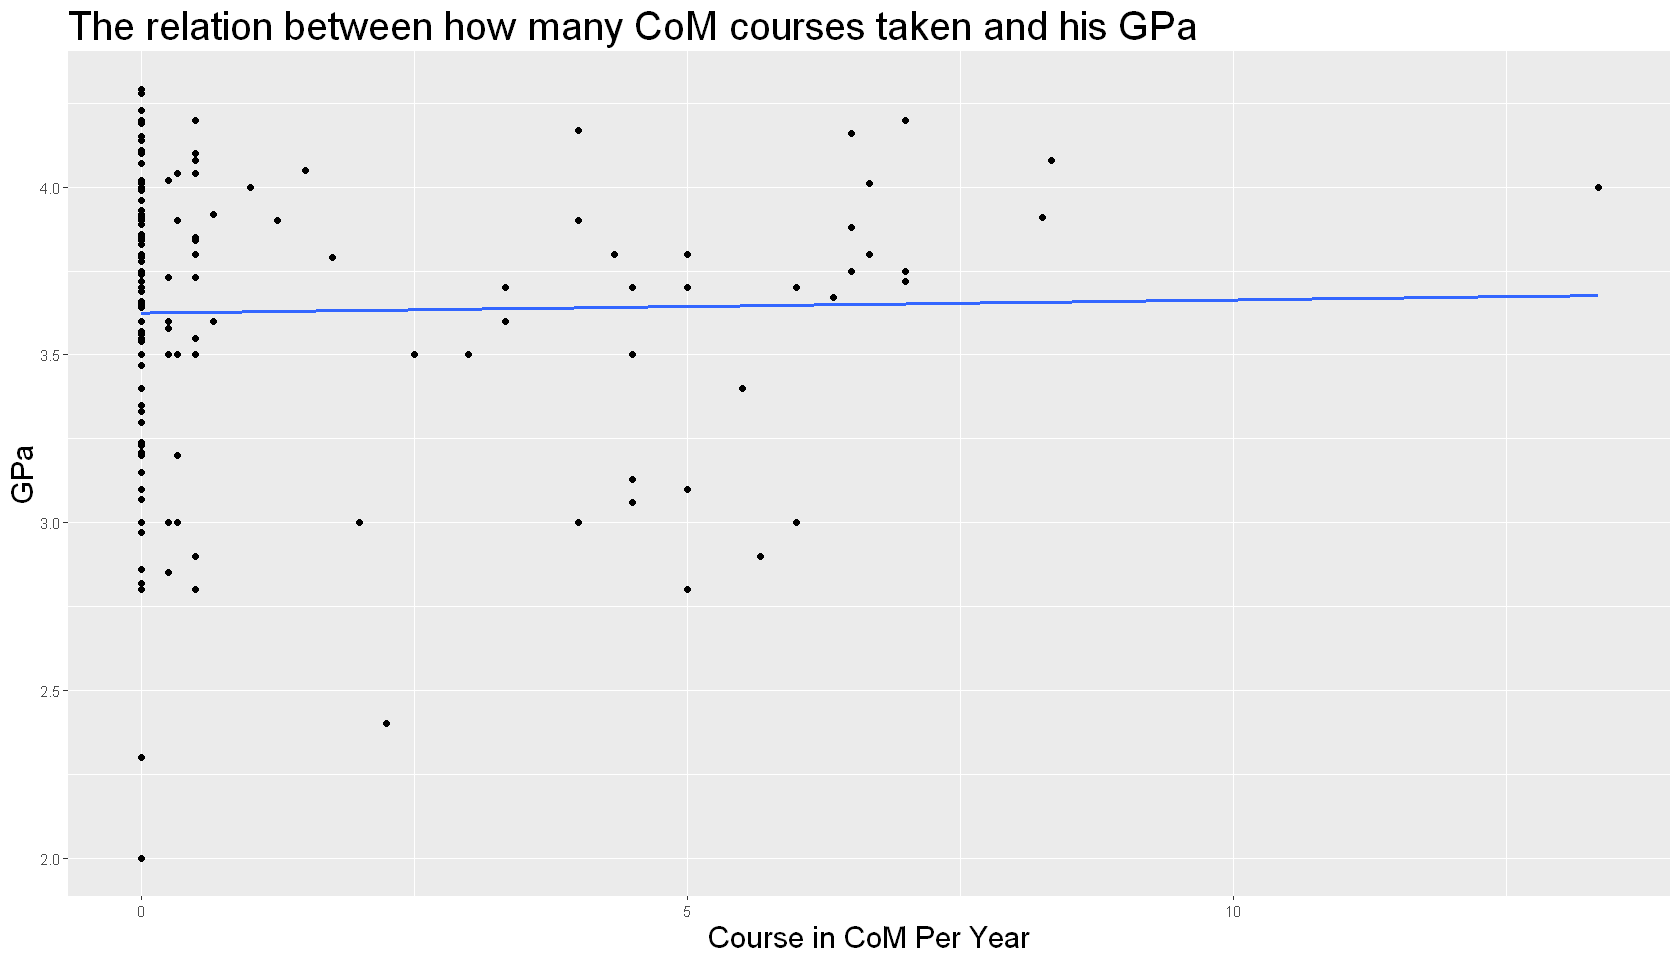

In [181]:
options(repr.plot.width=14, repr.plot.height=8)
data %>% ggplot(aes(y = GPA, x = coursesInCoMPerYear)) + geom_point() +
    geom_smooth(method = 'lm', se = F, fullrange = T) +
    labs(x = "Course in CoM Per Year", y = "GPa", title = "The relation between how many CoM courses taken and his GPa") +
    theme(plot.title = element_text(size = 24),
          axis.title = element_text(size = 18))

#### 相關係數

In [182]:
cor(data$GPA, data$coursesInCoMPerYear)

[1] 0.02106021

### 只考慮有修過一門以上管院課程的人(參考性低)

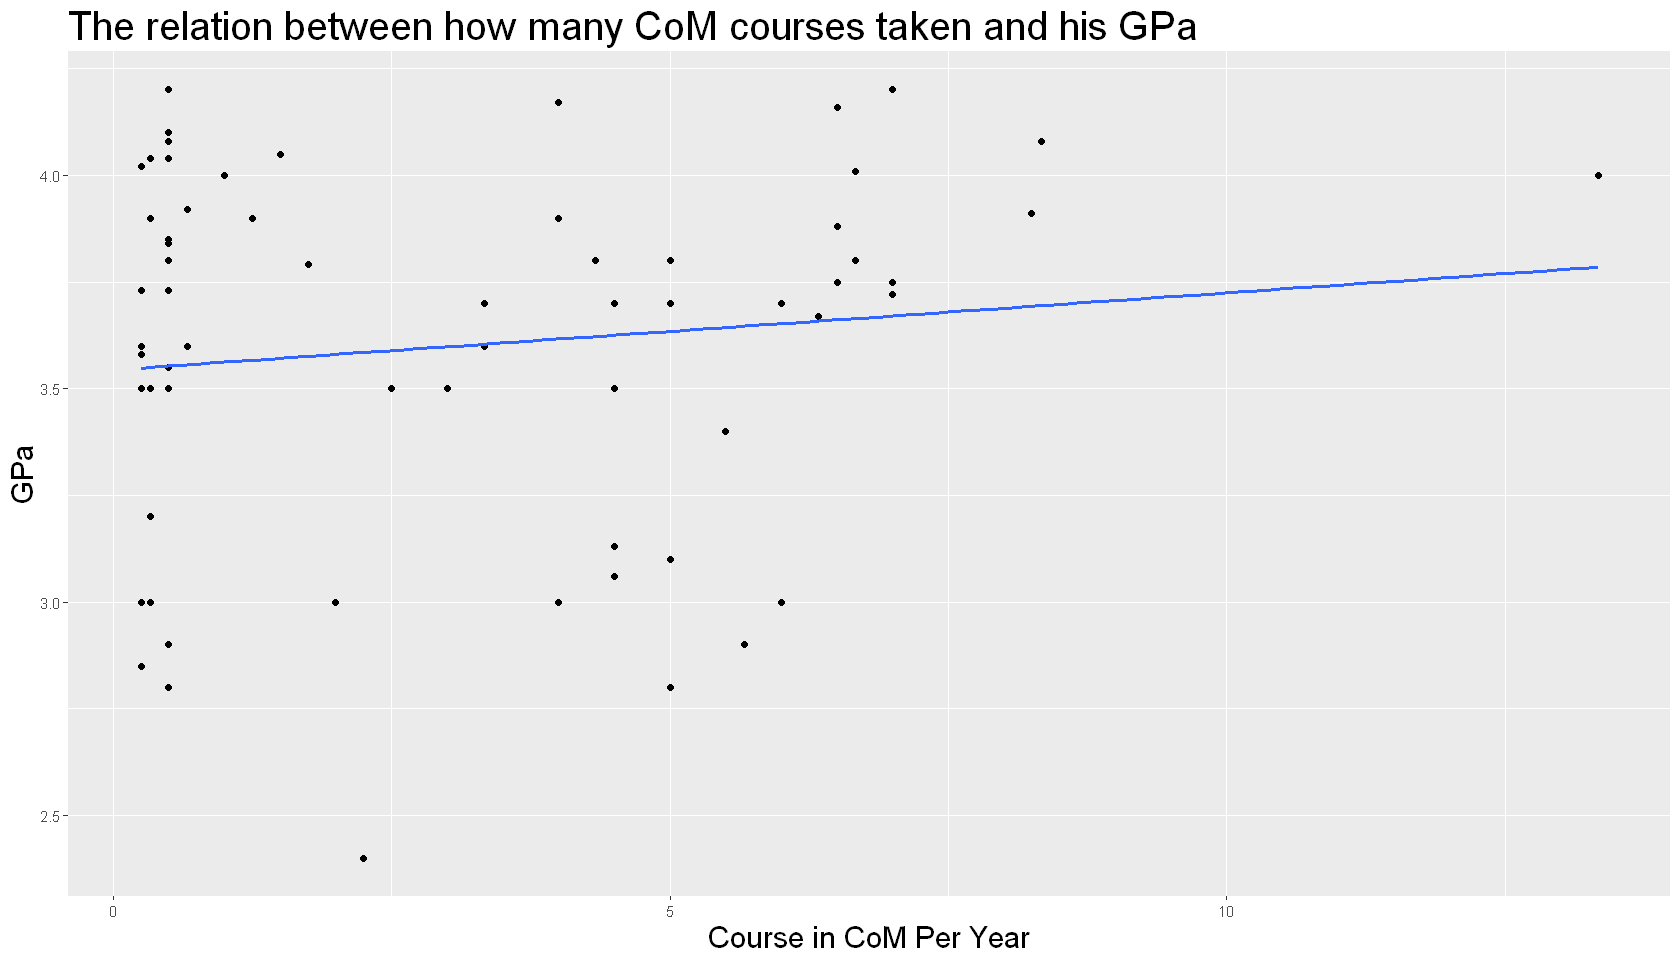

In [183]:
sample <- data %>% filter(coursesInCoMPerYear > 0)
sample %>% ggplot(aes(y = GPA, x = coursesInCoMPerYear)) + geom_point() +
    geom_smooth(method = 'lm', se = F, fullrange = T) +
    labs(x = "Course in CoM Per Year", y = "GPa", title = "The relation between how many CoM courses taken and his GPa") +
    theme(plot.title = element_text(size = 24),
          axis.title = element_text(size = 18))

In [184]:
cor(sample$GPA, sample$coursesInCoMPerYear)

[1] 0.12317

#### 此樣本性別分布

In [185]:
sample %>% group_by(gender) %>% summarise(n=n()) %>% mutate(p = n / nrow(sample))

gender,n,p
<int>,<int>,<dbl>
1,33,0.4852941
2,35,0.5147059


#### 此樣本學院分布

In [186]:
sample %>% group_by(school) %>% summarise(n=n()) %>% mutate(p = n / nrow(sample))

school,n,p
<int>,<int>,<dbl>
1,7,0.10294118
2,2,0.02941176
3,6,0.08823529
4,5,0.07352941
5,5,0.07352941
6,3,0.04411765
7,35,0.51470588
9,4,0.05882353
10,1,0.01470588


#### 此樣本年級分布

In [187]:
sample %>% group_by(grade) %>% summarise(n=n()) %>% mutate(p = n / nrow(sample))

grade,n,p
<int>,<int>,<dbl>
2,24,0.3529412
3,24,0.3529412
4,20,0.2941176


### 考慮非管院學生

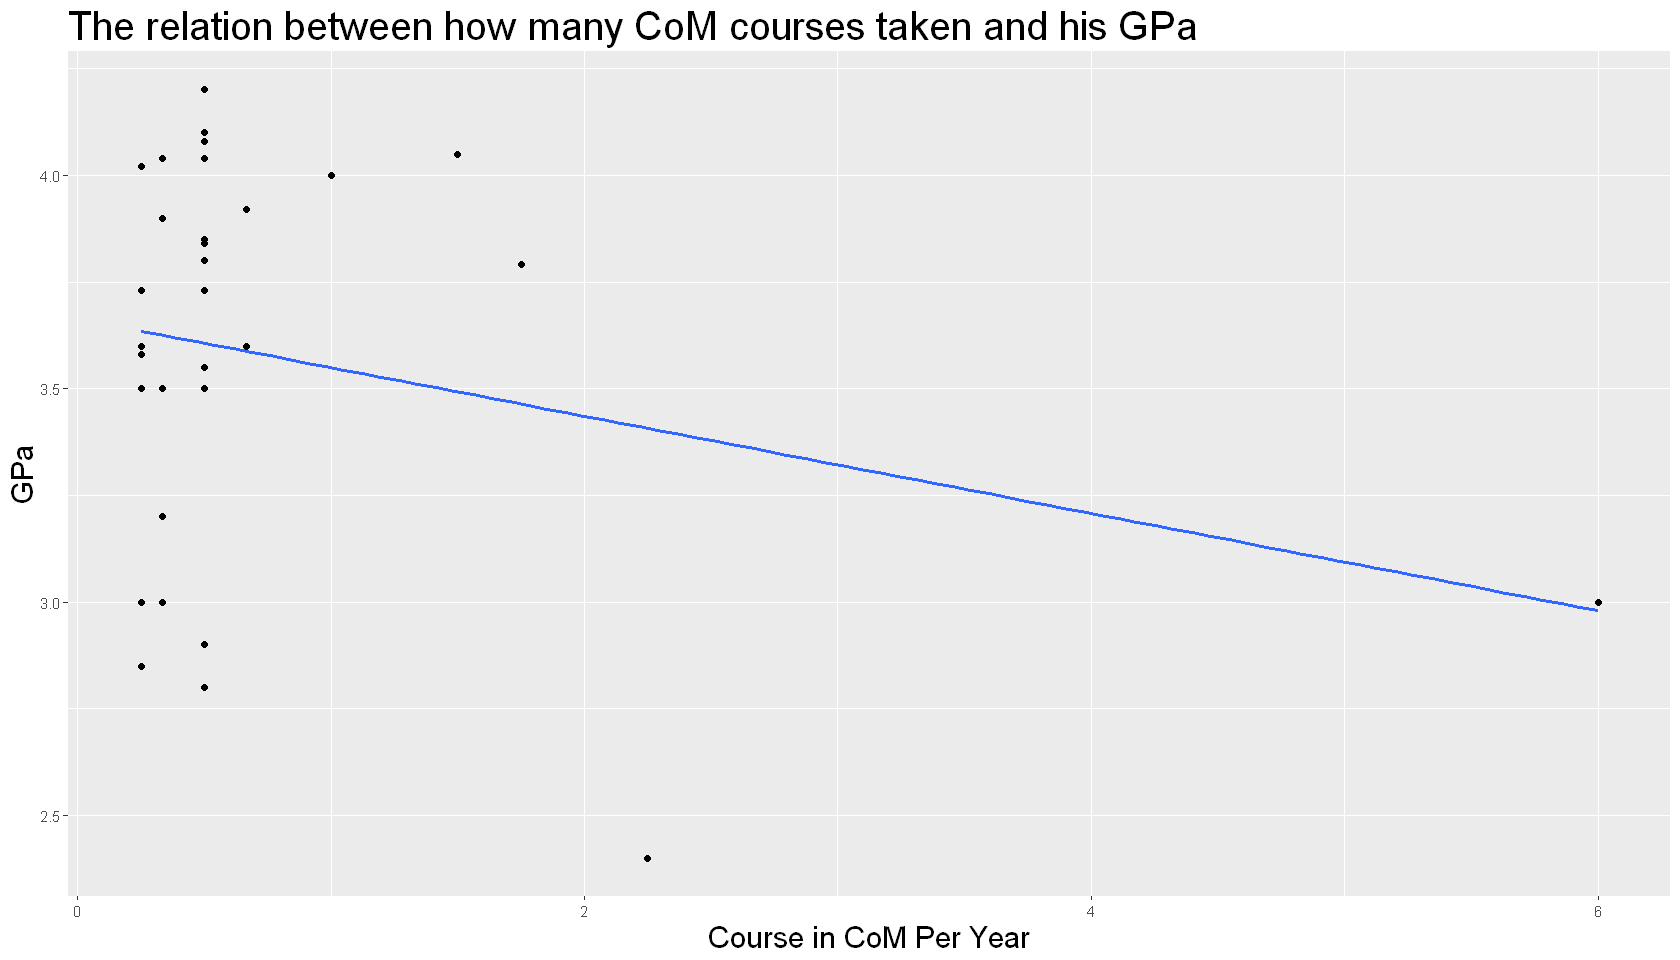

In [188]:
sample <- data %>% filter(school != 7) %>% filter(coursesInCoMPerYear > 0)
sample %>% ggplot(aes(y = GPA, x = coursesInCoMPerYear)) + geom_point() +
    geom_smooth(method = 'lm', se = F, fullrange = T) +
    labs(x = "Course in CoM Per Year", y = "GPa", title = "The relation between how many CoM courses taken and his GPa") +
    theme(plot.title = element_text(size = 24),
          axis.title = element_text(size = 18))

#### 相關係數

In [189]:
cor(sample$GPA, sample$coursesInCoMPerYear)

[1] -0.2633405

#### 此樣本性別分布

In [190]:
sample %>% group_by(gender) %>% summarise(n=n()) %>% mutate(p = n / nrow(sample))

gender,n,p
<int>,<int>,<dbl>
1,19,0.5757576
2,14,0.4242424


#### 此樣本學院分布

In [191]:
sample %>% group_by(school) %>% summarise(n=n()) %>% mutate(p = n / nrow(sample))

school,n,p
<int>,<int>,<dbl>
1,7,0.21212121
2,2,0.06060606
3,6,0.18181818
4,5,0.15151515
5,5,0.15151515
6,3,0.09090909
9,4,0.12121212
10,1,0.03030303


#### 此樣本年級分布

In [192]:
sample %>% group_by(grade) %>% summarise(n=n()) %>% mutate(p = n / nrow(sample))

grade,n,p
<int>,<int>,<dbl>
2,12,0.3636364
3,8,0.2424242
4,13,0.3939394


### 只考慮管院學生

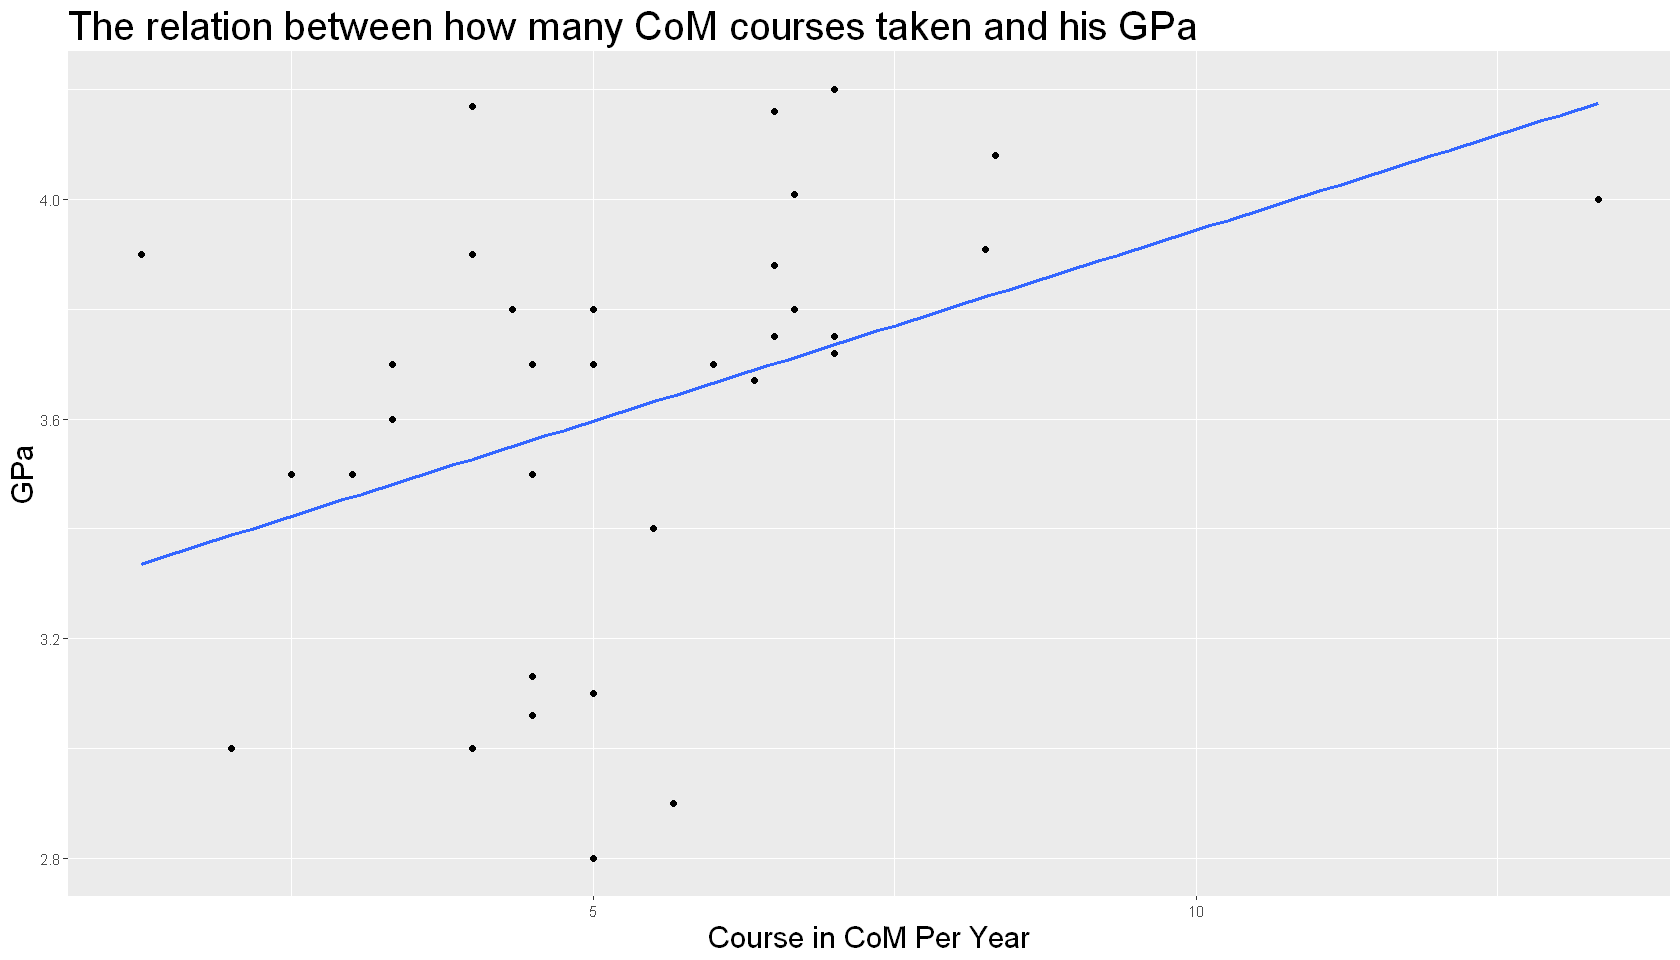

In [193]:
sample <- data %>% filter(school == 7)
sample %>% ggplot(aes(y = GPA, x = coursesInCoMPerYear)) + geom_point() +
    geom_smooth(method = 'lm', se = F, fullrange = T) +
    labs(x = "Course in CoM Per Year", y = "GPa", title = "The relation between how many CoM courses taken and his GPa") +
    theme(plot.title = element_text(size = 24),
          axis.title = element_text(size = 18))

#### 相關係數

In [194]:
cor(sample$GPA, sample$coursesInCoMPerYear)

[1] 0.3859246

#### 此樣本性別分布

In [195]:
sample %>% group_by(gender) %>% summarise(n=n()) %>% mutate(p = n / nrow(sample))

gender,n,p
<int>,<int>,<dbl>
1,14,0.4
2,21,0.6


#### 此樣本學院分布

In [196]:
sample %>% group_by(school) %>% summarise(n=n()) %>% mutate(p = n / nrow(sample))

school,n,p
<int>,<int>,<dbl>
7,35,1


#### 此樣本年級分布

In [197]:
sample %>% group_by(grade) %>% summarise(n=n()) %>% mutate(p = n / nrow(sample))

grade,n,p
<int>,<int>,<dbl>
2,12,0.3428571
3,16,0.4571429
4,7,0.2000000
